# Data Analysis Notebook

This data analysis notebook is a collection of common methods shown using static analysis and visualizations.

### Imports

These are imports the notebook uses throughout, be sure this is executed first.

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

### Load Data

We select a dataset from the datasets folder and view what the dataframe looks like in the top 5 rows.

In [101]:
# specify the folder where the datasets are stored
datasets_folder = 'datasets/'

# Specify the file path to the CSV file containing the data
file_path = datasets_folder + 'fisher_iris.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display DataFrame information
print('Number of cases: ', df.shape[0])

print('Number of classes: ', len(df['class'].unique()))
print('Classes: ', df['class'].unique())

print(df['class'].value_counts(), sep='\n')

print('Number of attributes: ', df.shape[1])
print('Attributes: ', df.columns.drop('class').values)

# Display the top 5 rows of the DataFrame
df.head()

Number of cases:  150
Number of classes:  3
Classes:  ['Setosa' 'Versicolor' 'Virginica']
class
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64
Number of attributes:  5
Attributes:  ['sepal.length' 'sepal.width' 'petal.length' 'petal.width']


,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Data Normalization

First we must normalize the data frame for all numerical values we utilize min-max normalzation.
To perform min-max normalization on a numerical variable, you can use the following formula:

Normalized Value = (Value - Min) / (Max - Min)


In [61]:
# Get the column names of the DataFrame
columns = df.columns

# remove the 'class' column
columns = columns.drop('class')
df_normalized = df.copy()

# min max normalization
df_normalized[columns] = (df[columns] - df[columns].min()) / (df[columns].max() - df[columns].min())

### Confiuration

We setup consistent figure size and alpha transparency value, and a colormap based on the classes of the dataset.

In [75]:
fsize = (10, 6)  # figure size
a = 0.4          # transparency

# get the unique class names
class_names = df['class'].unique()

# Set the color map based on the number of classes in the 'class' column
class_names = [name.lower() for name in class_names]

# Binary classification
if len(class_names) == 2 and ('positive' in class_names or 'negative' in class_names) or \
    ('yes' in class_names or 'no' in class_names) or \
    ('true' in class_names or 'false' in class_names) or \
    ('1' in class_names or '0' in class_names) or \
    ('malignant' in class_names or 'benign' in class_names):
        cmap = sns.color_palette(['green', 'red'])

# Three-class classification
elif len(class_names) == 3:
    cmap = sns.color_palette([(1, 0, 0), (0, 1, 0), (0, 0, 1)], 3)

# Multi-class classification
else:
    cmap = sns.color_palette('viridis', len(class_names))


### Pairplot

A pairplot or scatterplot matrix shows us the distributions and relations between each attribute of the dataset.

<Figure size 1000x600 with 0 Axes>

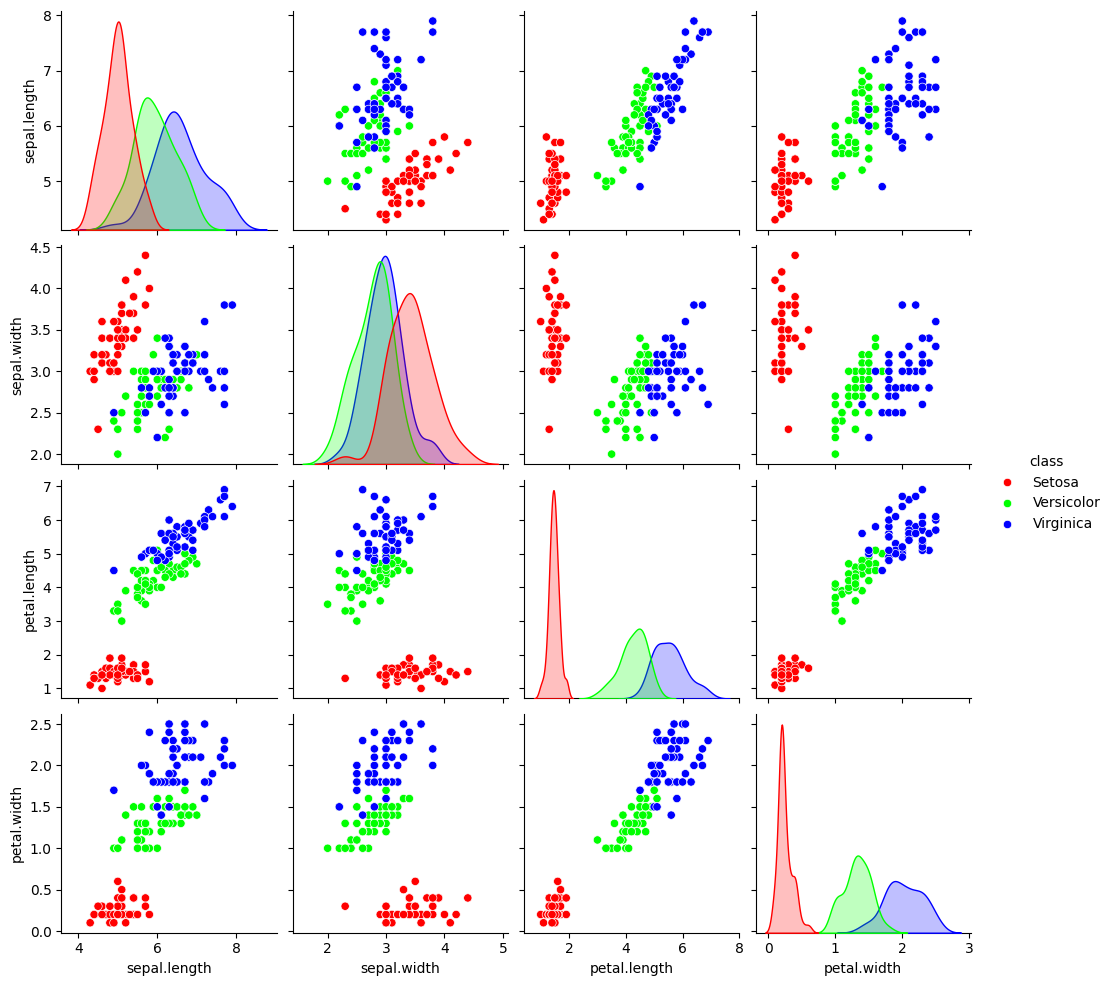

In [71]:
# set size
plt.figure(figsize=fsize)

# Create a pairplot of the DataFrame
sns.pairplot(df, hue='class', vars=columns, palette=cmap)

## Standard Lossless Visualization Techniques

Lossless visualization techniques allow for full multi-dimensional data distribution analysis. The following visualizations have this quality. These are the most standard of such visualizations.

### Parallel coordinates

We plot the data in a lossless General Line Coordinate method called Parallel coordinates showing all attributes and values.

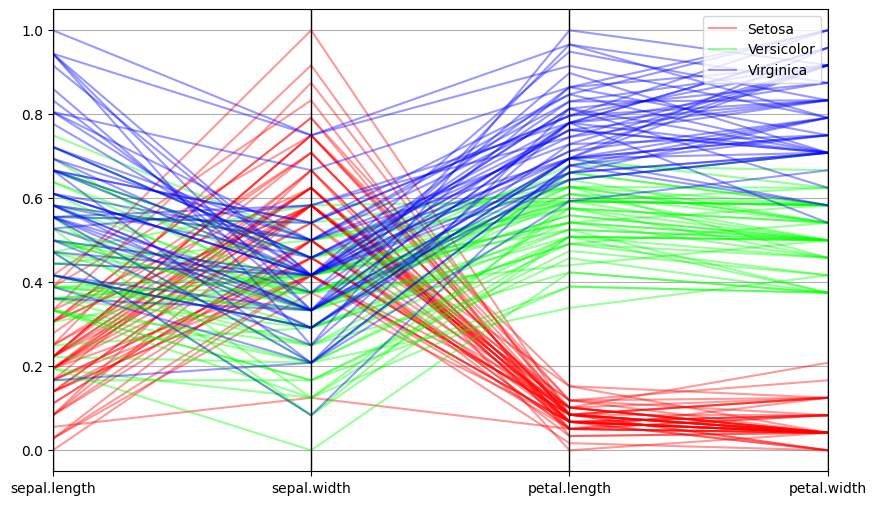

In [72]:
# set size
plt.figure(figsize=fsize)

# Plot the DataFrame in normalized parallel coordinates
pd.plotting.parallel_coordinates(df_normalized, 'class', color=cmap, alpha=a)

# Display the plot
plt.show()


### Andrew's Curves

A smoothed variant of Parallel coordinates using a finite Fourier series to produce smooth curves.

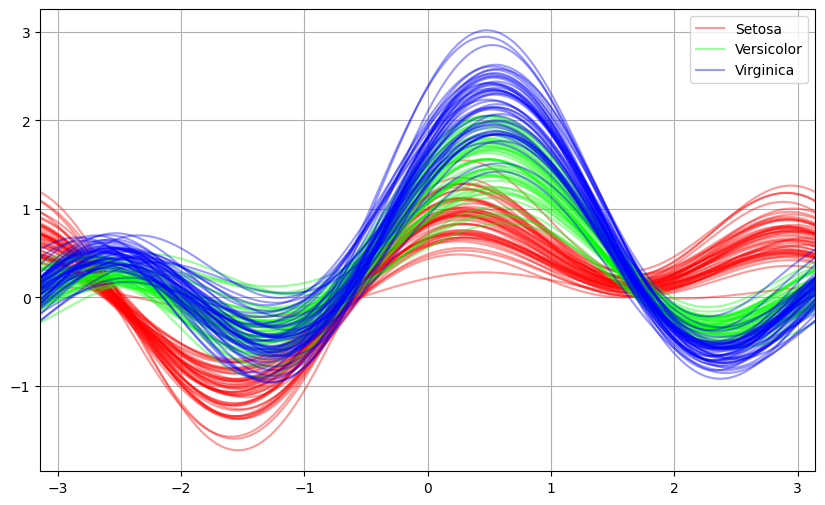

In [107]:
# set size
plt.figure(figsize=fsize)

# Plot the normalized DataFrame using Andrews Curves
pd.plotting.andrews_curves(df_normalized, 'class', color=cmap, alpha=a)

# Display the plot
plt.show()

### RadViz

RadViz or Radial Visualization additionally shows contribution of all elements but suffers from dimensional occlussion for high attribute counts. 

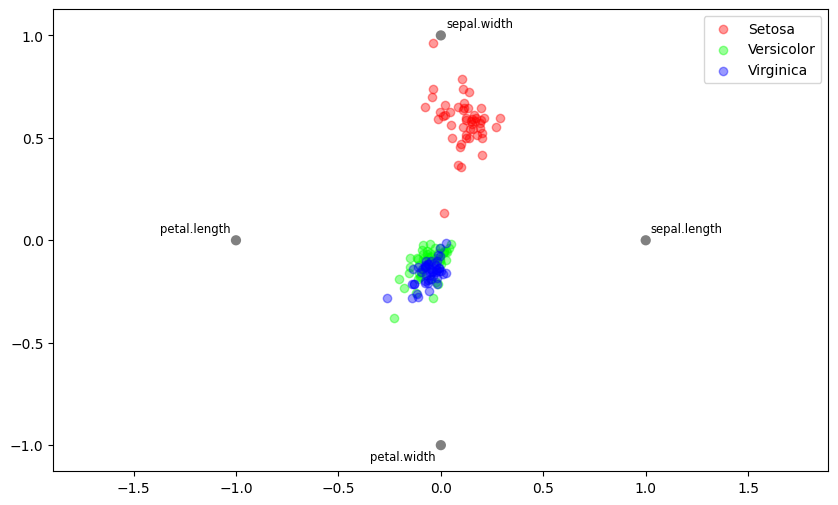

In [108]:
# set size
plt.figure(figsize=fsize)

# Create a Radviz plot of the DataFrame
pd.plotting.radviz(df_normalized, 'class', color=cmap, alpha=a)

# Display the plot
plt.show()

## Lossy Visualization Techniques

### T-SNE

T-Distributed Stochastic Neighbor Embedding

<Axes: xlabel='x', ylabel='y'>

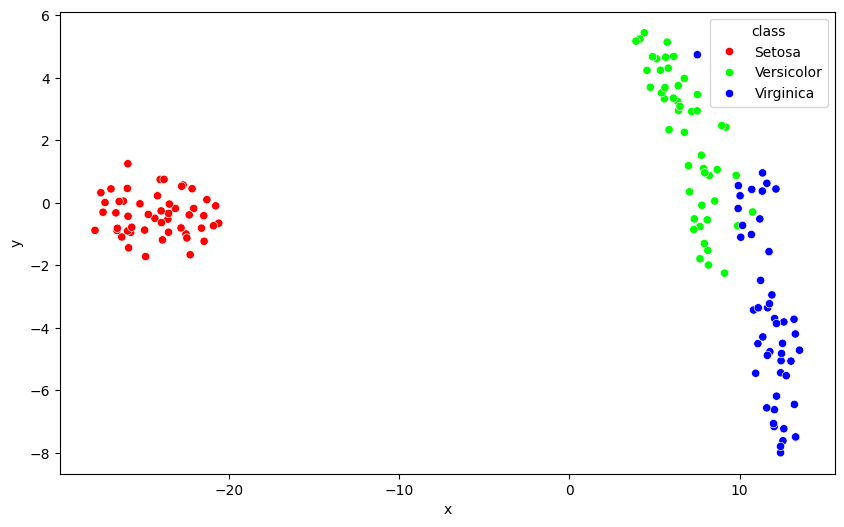

In [104]:
# visualize with t-SNE

# Create a TSNE object
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data
X_2d = tsne.fit_transform(df[columns])

# Create a DataFrame with the 2D data
df_2d = pd.DataFrame(X_2d, columns=['x', 'y'])

# Add the 'class' column to the DataFrame
df_2d['class'] = df['class']

# set size
plt.figure(figsize=fsize)

# Create a scatter plot of the 2D data
sns.scatterplot(x='x', y='y', hue='class', data=df_2d, palette=cmap)


### 3D T-SNE

Using 3 components in xyz cube.

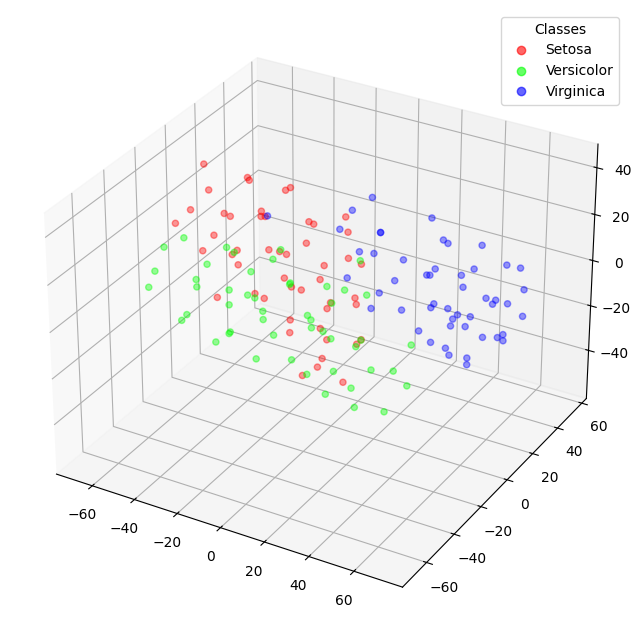

In [134]:
# Create a TSNE object
tsne = TSNE(n_components=3, random_state=0)

# Fit and transform the data
X_3d = tsne.fit_transform(df[columns])

# Create a DataFrame with the 3D data
df_3d = pd.DataFrame(X_3d, columns=['x', 'y', 'z'])

# Add the 'class' column to the DataFrame
df_3d['class'] = df['class']

# Create a ListedColormap from the seaborn color palette
cmap_listed = ListedColormap(sns.color_palette(cmap))

# Set the figure size
plt.figure(figsize=fsize)

# Create a 3D scatter plot of the 3D data
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(df_3d['x'], df_3d['y'], df_3d['z'], 
                       c=df_3d['class'].map({name: i for i, name in enumerate(class_names)}), 
                       cmap=cmap_listed, alpha=a)

# Add a legend
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
ax.legend(handles, class_names, title="Classes")

# Show the plot
plt.show()

### PCA

Principal Component Analysis

<Axes: xlabel='x', ylabel='y'>

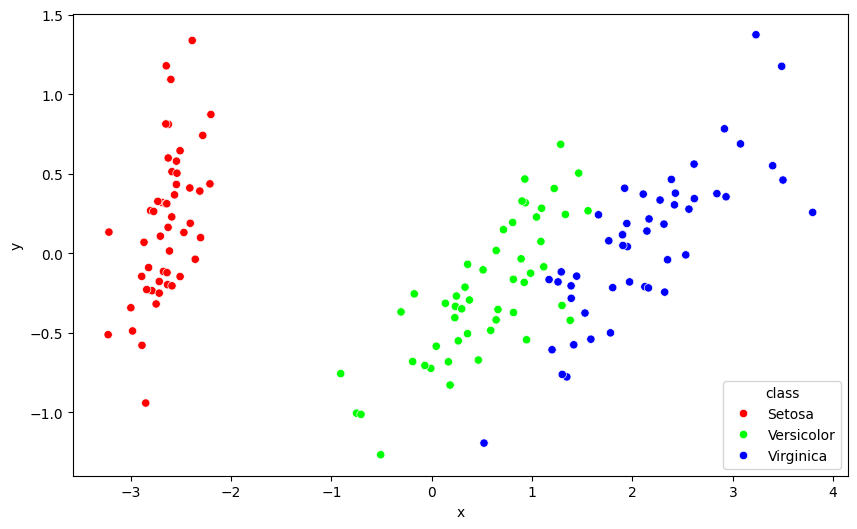

In [106]:
# visualize the data with PCA

# Create a PCA object
pca = PCA(n_components=2)

# Fit and transform the data
X_2d = pca.fit_transform(df[columns])

# Create a DataFrame with the 2D data
df_2d = pd.DataFrame(X_2d, columns=['x', 'y'])

# Add the 'class' column to the DataFrame
df_2d['class'] = df['class']

# set size
plt.figure(figsize=fsize)

# Create a scatter plot of the 2D data
sns.scatterplot(x='x', y='y', hue='class', data=df_2d, palette=cmap)